### Chapter 1 - Iris Dataset

Notebook para acompanhar o primeiro capítulo do livro **Introduction to Machine Learning** escrito por Matt Harrison.

In [2]:
!pip install mglearn

  Using cached mglearn-0.1.9.tar.gz (540 kB)
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=f4a91f6d811d4578337991fd3c0e880b02a080876f337d5467ca25493e5f68a3
  Stored in directory: c:\users\bueni\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [3]:
# Importando as libs que vamos utilizar
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

### Conhecendo o data set

A primeira aplicação que vamos fazer nesse capítulo é a **classificação de espécies de Iris**. Esse dataset é famoso e está contido na própria biblioteca do *scikit-learn*. 

Ele possui dados do comprimento das pétalas e das sépalas de diversas iris, além da identificação da espécie (*setosa*, *versicolor* ou *virginica*).

O nosso objetivo é criar um modelo que consiga aprender utilizando esses dados e prever a espécie de uma iris ainda não conhecida.

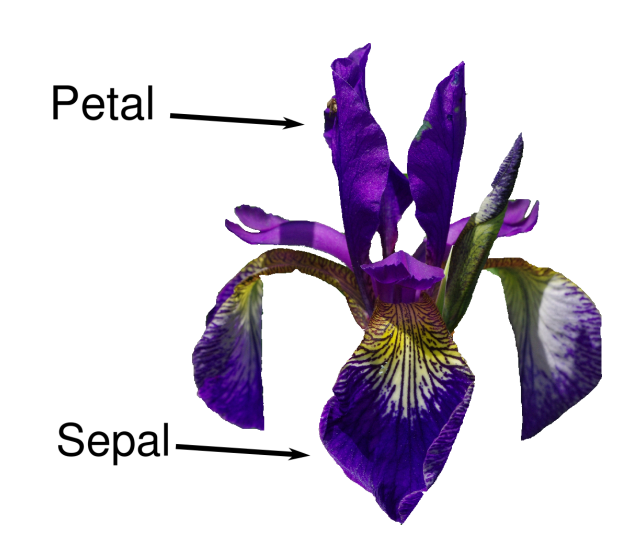

In [4]:
# Importando o dataset (formato *bunch*, próximo de um dict - com keys e values)

from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [7]:
print(f"Keys do iris_dataset: \n{iris_dataset.keys()}")

Keys do iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

O dataset tem seus dados em formato de uma *numpy.array* como value da key 'data'. O nome das features do modelo (as medidas da flor) estão na key 'feature_names'. Já o nome das espécies (as classificações) são values da key 'target_names'.

In [12]:
print(f"Data type: {type(iris_dataset['data'])}\n\n")
print(f"Feature Names {iris_dataset['feature_names']}\n\n")
print(f"Target Names {iris_dataset['target_names']}")

Data type: <class 'numpy.ndarray'>


Feature Names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Target Names ['setosa' 'versicolor' 'virginica']


In [16]:
print(f"Esse data set possui {iris_dataset['data'].shape[0]} linhas (flores) e {iris_dataset['data'].shape[1]} colunas")

Esse data set possui 150 linhas (flores) e 4 colunas


In [17]:
print("Head:\n{}".format(iris_dataset['data'][:5]))

Head:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Target:\n{}".format(iris_dataset['target'][:5]))

Target:
[0 0 0 0 0]


De acordo com a descrição do data set, as 5 primeiras linhas correspondem a iris do tipo 0 - 'setosa'.

Após a exploração inicial do dataset, vamos splitar ele em um subset de treino e outro de test, para poder avaliar o desempenho. 
Para isso, será utilizado o `train_test_split` da biblioteca *scikit-learn*.

Como dataset já é balanceado, não será necessário utilizar o stratify.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                        iris_dataset['target'], random_state=0)

### EDA - Test Set

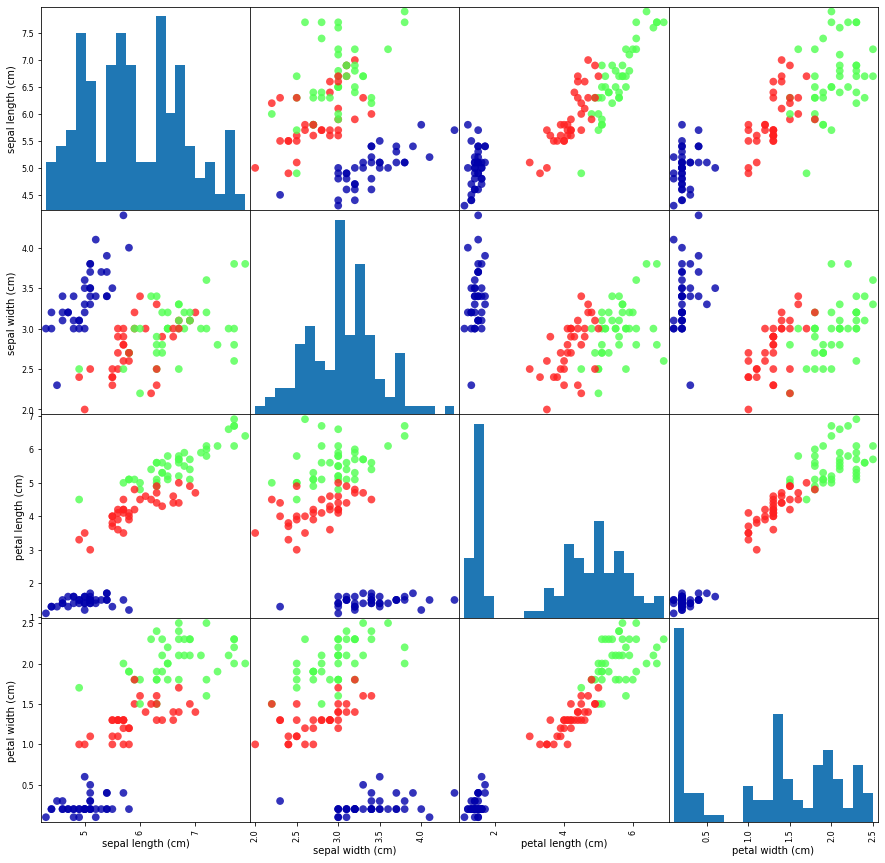

In [26]:
#Para fazer o EDA, primeiro vou transformar o dataset um df
df_train = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(df_train, c=y_train, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)


Com o pairplot do dataset podemos ver que nenhuma das features possui distribuição normal (a única que se aproxima é a *sepal_width*). Além disso, dá pra observar que as 3 classes são bem separadas nos scatterplots, o que vai facilitar na hora do modelo de machine learning separar as espécies.

### Construindo o Modelo - k-Nearest Neighbors

Em primeiro momento, precisamos importar o modelo da biblioteca do *scikit-learn* e instaciá-lo em uma váriavel. Vamos usar k=1 como parâmetro 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
# Fit no subset de treino
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Para avaliar o modelo, vamos usar fazer uma previsão usando o subset de teste e compará-la com as classificações verdadeiras (y_test). 

In [30]:
y_pred = model_knn.predict(X_test)
print(f"Previsões: {[iris_dataset['target_names'][pred] for pred in y_pred]}")

Previsões: ['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica']


In [31]:
print(f"Score do modelo no subset de test: {np.mean(y_pred == y_test)}")

Score do modelo no subset de test: 0.9736842105263158
